### Assignment Instructions

This notebook is designed to assist you in completing the CU IBM Capstone Final Exam - you will not submit this notebook for a grade. 

While you are completing the final exam, have this notebook open, and reference the exam question and answer options while working on your code here. Both the exam and this notebook draw on your experiences from the IBM Applied Data Science Capstone. You may reference the assignments from the course while completing the exam. 

Before you begin, you should have the following libraries installed: 

1. requests
2. pandas
3. numpy
4. matplotlib
5. seaborn
6. scikit-learn

If you do not, access the corresponding documentation for install instrcutions. 

### Question 2

The first step to predict if the first stage of a Falcon 9 will successfully land is to gather data about previous attempts.  One method to gather data is to access an API. Using the starter code below, make a call to the SpaceX API and gather the v4 past launches data. 

In [60]:
import requests

# Your call to the API using get
## Use this area to answer question 2 on the assessment
spacex_api="https://api.spacexdata.com/v4/launches/past"

# Make a GET request to the SpaceX API
response=requests.get(spacex_api)
# Print the response as JSON
print(response.json())

[{'fairings': {'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}, 'links': {'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png', 'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}, 'static_fire_date_utc': '2006-03-17T00:00:00.000Z', 'static_fire_date_unix': 1142553600, 'net': False, 'window': 0, 'rocket': '5e9d0d95eda69955f709d1eb', 'success': False, 'failures': [{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}], 'details': 'Engine failure at 33 seconds and loss of vehicle', 'crew': [], 'ships': [], 'capsules': [], 'payloads': ['5eb0e4b5b6c3bb0006eeb1e1

In [55]:
response=requests.get("https://api.spacexdata.com/v4/rockets")
# Print the response as JSON
print(response.content)

b'[{"height":{"meters":22.25,"feet":73},"diameter":{"meters":1.68,"feet":5.5},"mass":{"kg":30146,"lb":66460},"first_stage":{"thrust_sea_level":{"kN":420,"lbf":94000},"thrust_vacuum":{"kN":480,"lbf":110000},"reusable":false,"engines":1,"fuel_amount_tons":44.3,"burn_time_sec":169},"second_stage":{"thrust":{"kN":31,"lbf":7000},"payloads":{"composite_fairing":{"height":{"meters":3.5,"feet":11.5},"diameter":{"meters":1.5,"feet":4.9}},"option_1":"composite fairing"},"reusable":false,"engines":1,"fuel_amount_tons":3.38,"burn_time_sec":378},"engines":{"isp":{"sea_level":267,"vacuum":304},"thrust_sea_level":{"kN":420,"lbf":94000},"thrust_vacuum":{"kN":480,"lbf":110000},"number":1,"type":"merlin","version":"1C","layout":"single","engine_loss_max":0,"propellant_1":"liquid oxygen","propellant_2":"RP-1 kerosene","thrust_to_weight":96},"landing_legs":{"number":0,"material":null},"payload_weights":[{"id":"leo","name":"Low Earth Orbit","kg":450,"lb":992}],"flickr_images":["https://imgur.com/DaCfMsj.jp

In [57]:
print(response) # not JSON
print(response.status_code) # 200

<Response [200]>
200


### Question 3

Now that you have gathered the data from the SpaceX API, it would be useful to convert the JSON into a useful format for future data analysis and visualization. Using the start code below, use pandas to normalize (flatten) the data into a table. You may want to review the pandas function json_normalize(). 

In [4]:
import pandas as pd

# Use this area to add/edit code to answer question 3 on the assessment as needed.
## NOTE: Sometimes Jupyter can be sensitive to cut/paste. 
## If you get an error, sometimes direct typing helps.

data=pd.json_normalize(response.json()) 
print(data) 

# Once you have your dataframe, you may wish to update the number of columns that are visable. 
# To do this, you could use the following line of code: 
# pd.set_option('display.max_columns', None)
# Change 'None' to the max number of visible columns. None will show all columns.
pd.set_option('display.max_columns', 100)

         static_fire_date_utc  static_fire_date_unix    net  window  \
0    2006-03-17T00:00:00.000Z           1.142554e+09  False     0.0   
1                        None                    NaN  False     0.0   
2                        None                    NaN  False     0.0   
3    2008-09-20T00:00:00.000Z           1.221869e+09  False     0.0   
4                        None                    NaN  False     0.0   
..                        ...                    ...    ...     ...   
182                      None                    NaN  False     NaN   
183                      None                    NaN  False     NaN   
184                      None                    NaN  False     NaN   
185                      None                    NaN  False     NaN   
186                      None                    NaN  False     NaN   

                       rocket success  \
0    5e9d0d95eda69955f709d1eb   False   
1    5e9d0d95eda69955f709d1eb   False   
2    5e9d0d95eda69955f70

In [8]:
# Filter the dataframe to show only the rocket "5e9d0d95eda69955f709d1eb" and flight number 1
data_q3 = data[(data['rocket'] == "5e9d0d95eda69955f709d1eb") & (data['flight_number'] == 1)]
data_q3

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN


In [ ]:
# Display the "data" for row number 185
print(data.iloc[185])

static_fire_date_utc                                                      None
static_fire_date_unix                                                      NaN
net                                                                      False
window                                                                     NaN
rocket                                                5e9d0d95eda69973a809d1ec
success                                                                   True
failures                                                                    []
details                                                                   None
crew                                                                        []
ships                                                                       []
capsules                                                                    []
payloads                                            [631616a7ffc78f3b8567071a]
launchpad                                           

### Question 4

Another method to gather data is web scraping, which gathers data directly from a website rather than an API. There are many web scraping options, but BeautifulSoup is a common library that works well with Python requests.

Review and complete the code below to find the title of the linked Wikipedia page and explore the page tables.

In [12]:
#!pip3 install beautifulsoup4
#!pip3 install requests

import requests
from bs4 import BeautifulSoup

static_url="https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"
response2=requests.get(static_url)
#print(response2.text)

soup=BeautifulSoup(response2.text, 'html.parser')
#print(soup.prettify())
#print(soup.title)

html_tables=soup.find_all("table")
#print(html_tables) 

first_launch_table=html_tables[2] # There is a "2" here because tables start at 0 not at 1
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [ ]:
# Display "Launch Outcomes"
print(html_tables[1].prettify()) 

<table class="col-begin" role="presentation">
 <tbody>
  <tr>
   <td class="col-break">
    <div class="mw-heading mw-heading3">
     <h3 id="Launch_outcomes">
      Launch outcomes
     </h3>
    </div>
    <div class="chart noresize" style="padding-top:10px;margin-top:1em;max-width:480px;">
     <div style="position:relative;min-height:320px;min-width:480px;max-width:480px;">
      <div style="float:right;position:relative;min-height:240px;min-width:380px;max-width:380px;border-left:1px black solid;border-bottom:1px black solid;">
       <div style="position:absolute;left:177px;top:235px;height:4px;min-width:21px;max-width:21px;background-color:Black;-webkit-print-color-adjust:exact;border:1px solid Black;border-bottom:none;overflow:hidden;" title="Loss before launch: 1">
       </div>
       <div style="position:absolute;left:148px;top:235px;height:4px;min-width:21px;max-width:21px;background-color:DarkRed;-webkit-print-color-adjust:exact;border:1px solid DarkRed;border-bottom:none;

### Question 5

Once data is gathered, it can be explored, cleaned, and prepared for various analytical models and methods including visualization. Data preparation (and related steps) is not a “linear process” and often data must be reformatted, sampled, normalized, feature engineered, etc. depending on the model or method being used. A good first step after gathering data is to explore the data. 

For this question, you will use Seaborn to visualize correlation between variables. Review and adapt the example visualization below to explore the correlation between the Date and PayloadMass, Class and PayloadMass, and FlightNumber and LaunchSite.

In [45]:
# Install the following packages if you do not have them already
!pip install matplotlib
!pip install seaborn
!pip install -upgrade pip
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/29/7a/8bce8968883e9465de20be15542f4c7e221952441727c4dad24d534c6d99/scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/c0/53/eaada1a414c026673eb983f8b4a55fe5eb172725d33d62c1b21f63ff6ca4/scipy-1.15.2-cp312-cp312-

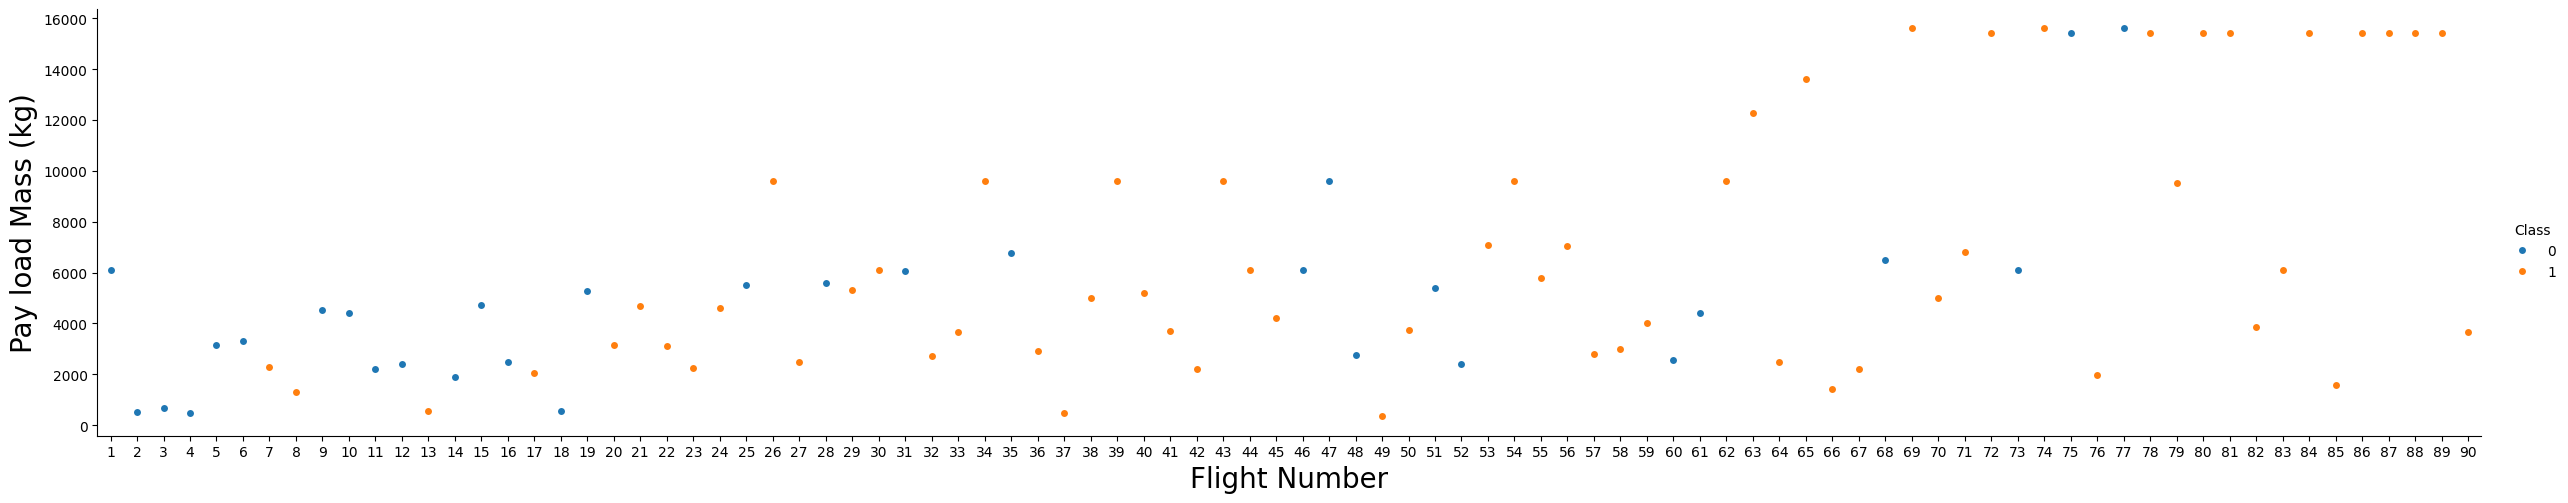

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv")
df.head(5)

sns.catplot(x="FlightNumber", y="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# You may also adapt the Seaborn exmple above to explore the correlation between: 
#   - Date and PayloadMass, 
#   - Class and PayloadMass,
#   - FlightNumber and LaunchSite.

                 Date  PayloadMass
Date         1.000000     0.554705
PayloadMass  0.554705     1.000000


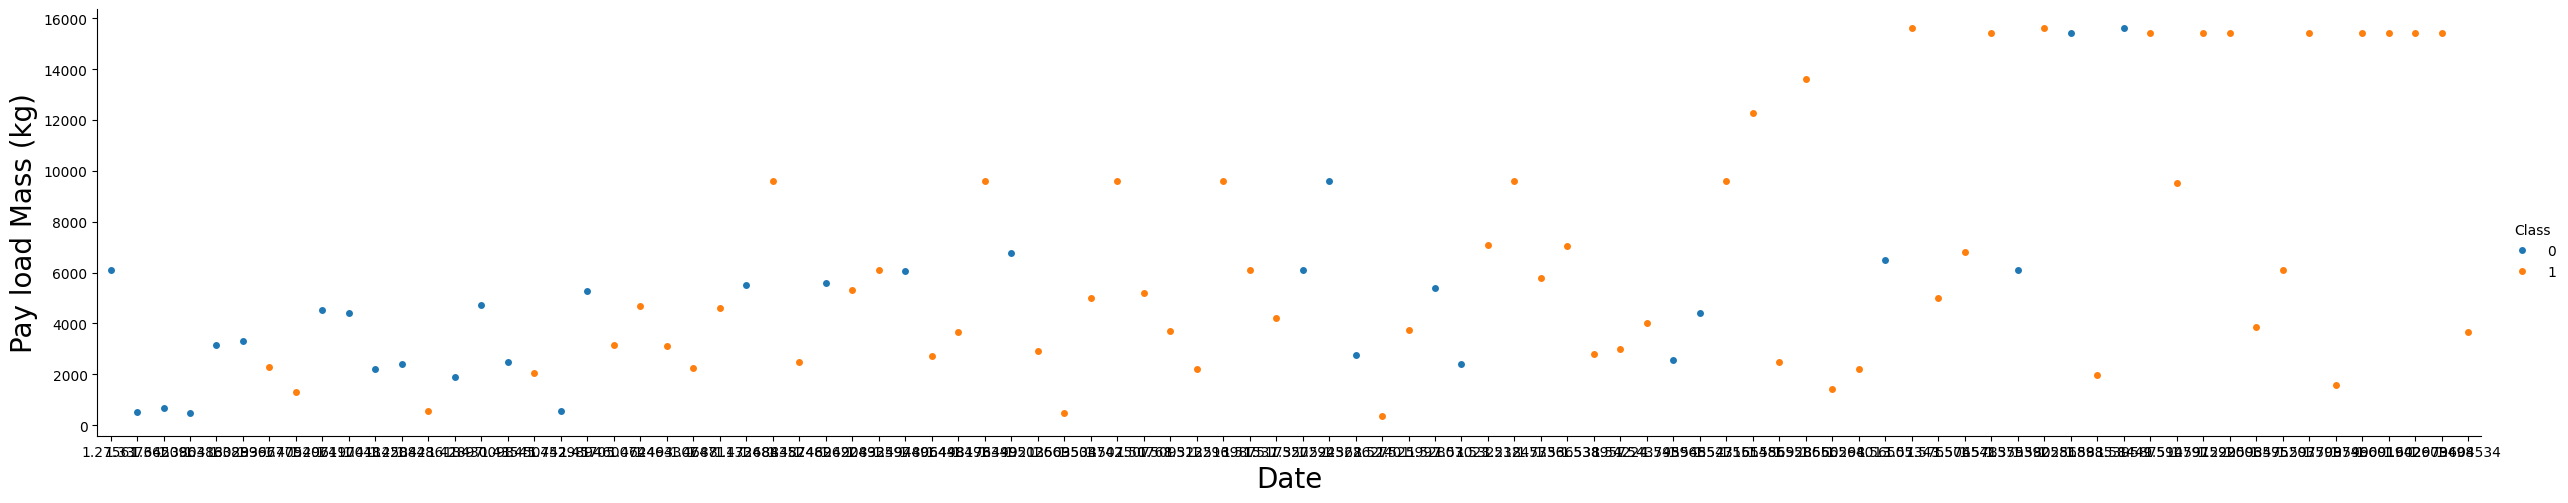

In [ ]:
# Calculate the correlation between PayLoadMass and Date.
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(pd.Timestamp.timestamp)
correlation = df[['Date', 'PayloadMass']].corr()
print(correlation) # Display the correlation matrix 
# The correlation between Date and PayloadMass is ~55, which indicates a positive correlation.
# Plot the correlation between Date and PayloadMass
sns.catplot(x="Date", y="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [31]:
# Calculate the correlation between Class and PayloadMass.
correlation = df[['Class', 'PayloadMass']].corr()
print(correlation) # Display the correlation matrix

                Class  PayloadMass
Class        1.000000     0.199992
PayloadMass  0.199992     1.000000


Class
0    4784.558961
1    6765.159637
Name: PayloadMass, dtype: float64


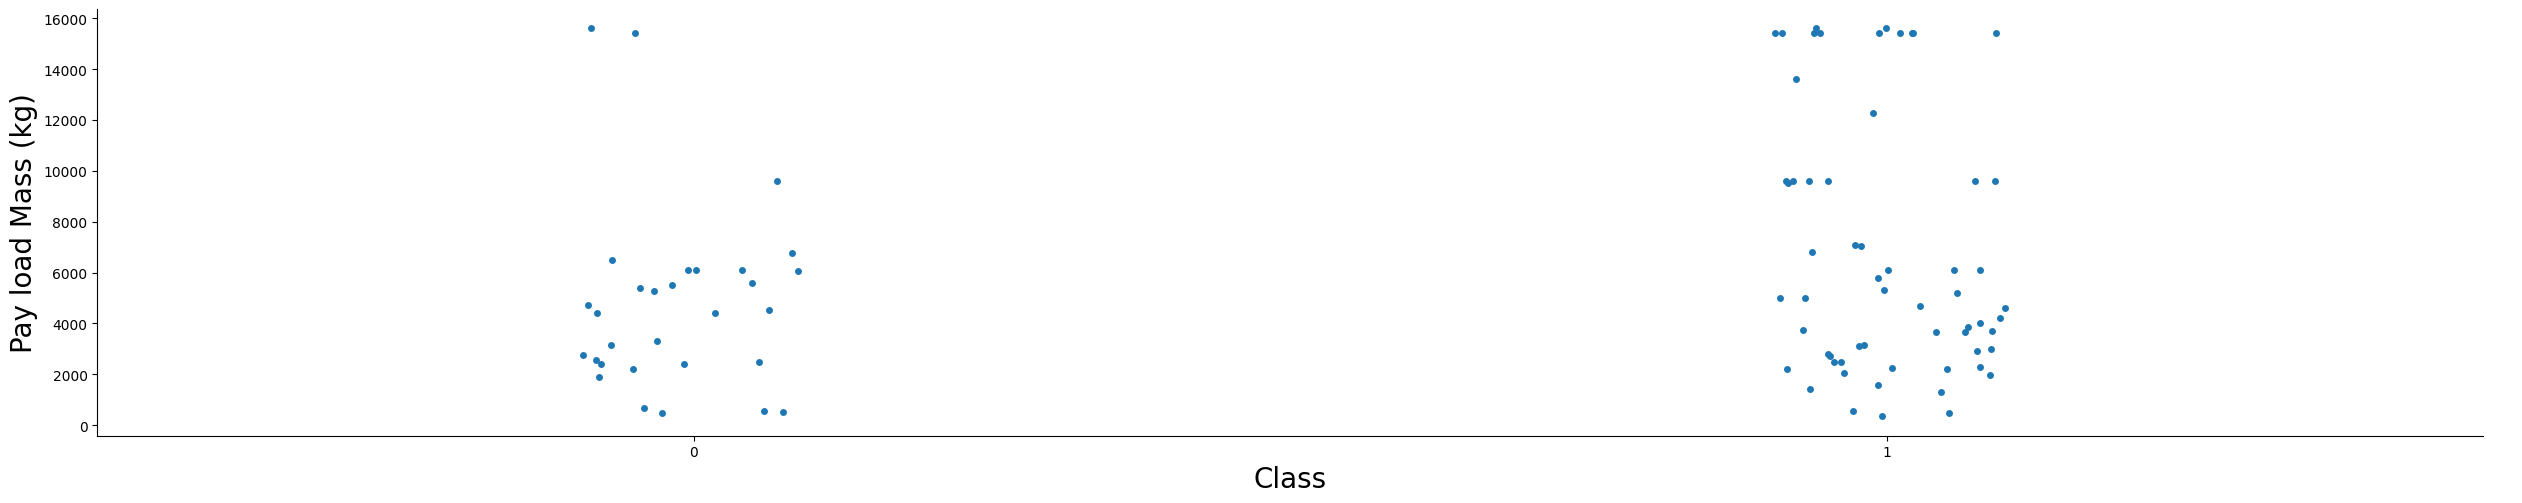

In [34]:
# Is payload mass higher for successful launches?
# Calculate the average payload mass for successful and unsuccessful launches
avg_payload_mass = df.groupby('Class')['PayloadMass'].mean()
print(avg_payload_mass) # Display the average payload mass for successful and unsuccessful launches
# The average payload mass for successful launches is higher than for unsuccessful launches.
# Plot the average payload mass for successful and unsuccessful launches
sns.catplot(x="Class", y="PayloadMass", data=df, aspect = 5)
plt.xlabel("Class",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [40]:
# Count the number of launches for each launch site
launch_site_counts = df['LaunchSite'].value_counts()
print(launch_site_counts) # Display the number of launches for each launch site

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


# Question 7



First we'll read our datasets in. 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Read in two datasets.
## The first dataset will be read into "data"
## and the second dataset will be read into "X"
## Have a look at some rows of each.

data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
print("The dataset called data\n", data.head(15))

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')
print("\nThe dataset called X\n", X.head(15))

The dataset called data
     FlightNumber        Date BoosterVersion  PayloadMass  Orbit    LaunchSite  \
0              1  2010-06-04       Falcon 9  6104.959412    LEO  CCAFS SLC 40   
1              2  2012-05-22       Falcon 9   525.000000    LEO  CCAFS SLC 40   
2              3  2013-03-01       Falcon 9   677.000000    ISS  CCAFS SLC 40   
3              4  2013-09-29       Falcon 9   500.000000     PO   VAFB SLC 4E   
4              5  2013-12-03       Falcon 9  3170.000000    GTO  CCAFS SLC 40   
5              6  2014-01-06       Falcon 9  3325.000000    GTO  CCAFS SLC 40   
6              7  2014-04-18       Falcon 9  2296.000000    ISS  CCAFS SLC 40   
7              8  2014-07-14       Falcon 9  1316.000000    LEO  CCAFS SLC 40   
8              9  2014-08-05       Falcon 9  4535.000000    GTO  CCAFS SLC 40   
9             10  2014-09-07       Falcon 9  4428.000000    GTO  CCAFS SLC 40   
10            11  2014-09-21       Falcon 9  2216.000000    ISS  CCAFS SLC 40   
11 

From the dataset called “data”, set Y to the Class column and convert it to a numpy array. 

In [47]:
# print(data["Class"])
## Notice that the LABEL is "Class" which can be 0 or 1. 
## Recall that 0 is not a success and 1 is a success.
LABEL = data["Class"].to_numpy()
print(LABEL)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


Next, standardize (normalize via z = (x - u) / s) the data in the dataset called x above.

In [48]:
MyStandardizer = preprocessing.StandardScaler()
X_norm=MyStandardizer.fit_transform(X)
print(X_norm)

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.67441914e+00 -1.19523159e+00 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.63592675e+00 -1.16267307e+00 -6.53912840e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 ...
 [ 1.63592675e+00  1.99100483e+00  3.49060516e+00 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.67441914e+00  1.99100483e+00  1.00389436e+00 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.71291154e+00 -5.19213966e-01 -6.53912840e-01 ... -8.35531692e-01
  -5.17306132e-01  5.17306132e-01]]


Split your data into a Training set and a Testing set:

In [49]:
X_train, X_test, label_train, label_test = train_test_split(X_norm, LABEL, test_size=0.2, random_state=1234 )
## You must use 1234 above or your answers will be different.
## X_train is the training portion
## X_test is the testing portion
## label_train are the labels for the X_train data
## label_test  are the labels for the X_test data

print(X_train)
print(label_train)
print(X_test)
print(label_test)

[[-0.6736169  -0.10816269 -0.65391284 ... -0.83553169  1.93309133
  -1.93309133]
 [-0.21170817 -0.193843    0.17499076 ...  1.19684269 -0.51730613
   0.51730613]
 [ 0.75060168  1.60972746  1.00389436 ...  1.19684269 -0.51730613
   0.51730613]
 ...
 [-0.25020056  0.74864038 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 [ 1.48195717  1.99100483  3.49060516 ...  1.19684269 -0.51730613
   0.51730613]
 [ 0.09623099 -0.71649287  0.17499076 ...  1.19684269 -0.51730613
   0.51730613]]
[0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0]
[[-0.32718535 -1.20594163 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 [ 0.55813971 -0.75654842 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 [ 0.78909408 -1.0024509   0.17499076 ...  1.19684269 -0.51730613
   0.51730613]
 ...
 [-0.13472338 -0.8353743   0.17499076 ...  1.19684269 -0.51730613
   0.51730613]
 [ 1.25100281  1.99100483  1.832

Set up and run Logistic regression, print accuracies and confusion matrix. 

In [50]:
## Run logistic regression
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator = lr, param_grid = parameters, cv = 10)
logreg_cv.fit(X_train, label_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

logreg_cv.score(X_train, label_train) ##accuracy of test set prediction
yhat=logreg_cv.predict(X_test)
confusion_matrix(label_test,yhat) ## Recall that label_test are the known labels of 
## the test dataset and yhat are the predicted labels for the test set.

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8321428571428571


array([[ 2,  5],
       [ 0, 11]])

# Question 8

Using most of the code from Question 7, make the needed adjustments (code updates, changes, edits) to use support vector machines rather than logistic regression to create a model that can predict the “Class” as 0 or 1.

Here are some hints to consider when using SVMs: 

```Python 
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator = svm, param_grid = parameters, cv = 10)
svm_cv.fit(X_train, label_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

svm_cv.score(X_train, label_train) ##accuracy of test set prediction
yhat=svm_cv.predict(X_test)
confusion_matrix(label_test,yhat) ## Recall that label_test are the known label

```


In [51]:
# Your code here

## A good first step is to check your data
print(X_train) ## training dataset
print(label_train) ## training dataset labels
print(X_test) ## testing dataset
print(label_test) ## testing dataset labels

## Next, you can either update/edit the 
## code in the Question 7 area above so that it performs SVMs with the given
## parameters, etc. or you can create your code here.
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator = svm, param_grid = parameters, cv = 10)
svm_cv.fit(X_train, label_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

svm_cv.score(X_train, label_train) ##accuracy of test set prediction
yhat=svm_cv.predict(X_test)
confusion_matrix(label_test,yhat) ## Recall that label_test are the known label

[[-0.6736169  -0.10816269 -0.65391284 ... -0.83553169  1.93309133
  -1.93309133]
 [-0.21170817 -0.193843    0.17499076 ...  1.19684269 -0.51730613
   0.51730613]
 [ 0.75060168  1.60972746  1.00389436 ...  1.19684269 -0.51730613
   0.51730613]
 ...
 [-0.25020056  0.74864038 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 [ 1.48195717  1.99100483  3.49060516 ...  1.19684269 -0.51730613
   0.51730613]
 [ 0.09623099 -0.71649287  0.17499076 ...  1.19684269 -0.51730613
   0.51730613]]
[0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0]
[[-0.32718535 -1.20594163 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 [ 0.55813971 -0.75654842 -0.65391284 ... -0.83553169 -0.51730613
   0.51730613]
 [ 0.78909408 -1.0024509   0.17499076 ...  1.19684269 -0.51730613
   0.51730613]
 ...
 [-0.13472338 -0.8353743   0.17499076 ...  1.19684269 -0.51730613
   0.51730613]
 [ 1.25100281  1.99100483  1.832

array([[ 4,  3],
       [ 0, 11]])

### Question 9

Using your code from Question 7, create any extra needed code to use Decision Trees as a model to predict the “Class” as 0 or 1. 

Some hints to consider that is specific for decision trees: 

```Python

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(random_state= 0) ## IMPORTANT you must have random_state= 0
tree_cv = GridSearchCV(estimator = tree, param_grid = parameters, cv = 10)
tree_cv.fit(X_train, label_train)

print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

yhat=tree_cv.predict(X_test)
print(yhat)

confusion_matrix(label_test,yhat)


```

In [52]:
## A good first step is to check your data
#print(X_train) ## training dataset
#print(label_train) ## training dataset labels
#print(X_test) ## testing dataset
#print(label_test) ## testing dataset labels

## You will need to edit/add to this code....

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(random_state= 0) ## IMPORTANT you must have random_state= 0
tree_cv = GridSearchCV(estimator = tree, param_grid = parameters, cv = 10)
tree_cv.fit(X_train, label_train)

print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

yhat=tree_cv.predict(X_test)
print(yhat)

confusion_matrix(label_test,yhat)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8732142857142857
[1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1]


/workspaces/DTSA-5841-IBM-Applied-DS-Capstone/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/DTSA-5841-IBM-Applied-DS-Capstone/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspaces/DTSA-5841-IBM-Applied-DS-Capstone/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/workspaces/DTSA-5841-IBM-Applied-DS-Capstone/.venv/lib/py

array([[ 4,  3],
       [ 0, 11]])

### Question 10

Using the code from Question 7  and the following extra hints, use k-nearest Neighbor classifier to classify the test dataset as either 0 or 1. 

Some hints to consider: 

```Python

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = KNN, param_grid = parameters, cv = 10)
knn_cv.fit(X_train, label_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

yhat = ??? #fill this in
confusion_matrix(label_test,yhat)

```

In [53]:
# Your code here
## A good first step is to check your data
#print(X_train) ## training dataset
#print(label_train) ## training dataset labels
#print(X_test) ## testing dataset
#print(label_test) ## testing dataset labels

## You will need to edit/add to this code....

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = KNN, param_grid = parameters, cv = 10)
knn_cv.fit(X_train, label_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

yhat = knn_cv.predict(X_test)
confusion_matrix(label_test,yhat)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8589285714285714


array([[ 3,  4],
       [ 0, 11]])